#### Table of contents

1. Understand the Problem Statement
1. Tweets Preprocessing and Cleaning
   1. Data Inspection
   1. Data Cleaning
1. Story Generation and Visualization from Tweets
1. Extracting Features from Cleaned Tweets
   1. Bag-of-Words
   1. TF-IDF
   1. Word Embeddings
1. Model Building: Sentiment Analysis
   1. Logistic Regression
   1. Support Vector Machine
   1. XGBoost
1. Model Fine-tuning
1. Summary


In [1]:
# !pip install nltk
import re  # for regular expressions
import nltk  # for removing extra symbols from tweet ( text Manipulation )
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# %matplotlib inline

In [2]:
# Let’s read train and test datasets.
train = pd.read_csv("train_data.csv")

In [12]:
train[train["label"] == 0].head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [13]:
train[train["label"] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [3]:
train.shape

(31962, 3)

In [4]:
train.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [16]:
train["label"].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

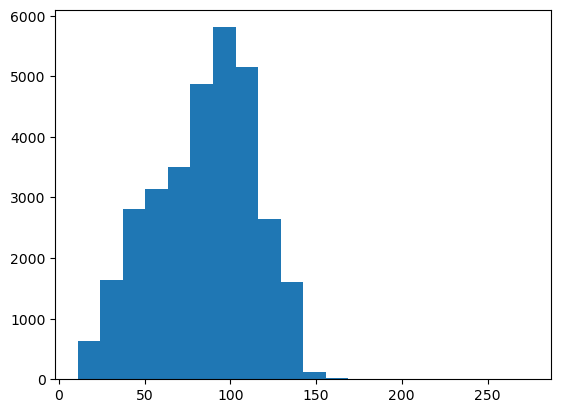

In [5]:
plt.hist(train.tweet.str.len(), bins=20, label="train")
plt.show()

Given below is a user-defined function to remove unwanted text patterns from the tweets.


In [6]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, "", input_txt)
    return input_txt

In [7]:
# created a new column and remove @ symbol from every tweet
train["tidy_tweet"] = np.vectorize(remove_pattern)(train["tweet"], r"@[\w]*")
train.head(10)

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !,welcome here ! i'm it's so #gr8 !


In [8]:
# Remove all the characters except alphabets and #
train.tidy_tweet = train.tidy_tweet.str.replace("[^a-zA-Z#]", " ")
train.head(10)

/tmp/ipykernel_722325/3603960809.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train.tidy_tweet = train.tidy_tweet.str.replace("[^a-zA-Z#]", " ")


,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


In [9]:
# removing short words is the hmm oh etc
train.tidy_tweet = train.tidy_tweet.apply(
    lambda x: " ".join([w for w in x.split() if len(w) > 3])
)
train.head(10)

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fare talking before they leave chaos disputes when they there #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,next school year year exams think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,love land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0,@user @user welcome here ! i'm it's so #gr8 !,welcome here


In [10]:
tokenized_tweet = train.tidy_tweet.apply(lambda x: x.split())
tokenized_tweet.head(10)

0                                                      [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1                                          [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                                                           [bihday, your, majesty]
3                                                                                                  [#model, love, take, with, time]
4                                                                                                [factsguide, society, #motivation]
5                                   [huge, fare, talking, before, they, leave, chaos, disputes, when, they, there, #allshowandnogo]
6                                                                                                        [camping, tomorrow, danny]
7    [next, school, year, year, exams, think, about, that, #school, #exams, 

In [11]:
# Now we can normalize the tokenized tweets.
from nltk.stem.porter import *

stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(
    lambda x: [stemmer.stem(i) for i in x]
)  # stemming
tokenized_tweet.head(10)

0                                                            [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1                                             [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                                                                       [bihday, your, majesti]
3                                                                                              [#model, love, take, with, time]
4                                                                                                  [factsguid, societi, #motiv]
5                                       [huge, fare, talk, befor, they, leav, chao, disput, when, they, there, #allshowandnogo]
6                                                                                                       [camp, tomorrow, danni]
7    [next, school, year, year, exam, think, about, that, #school, #exam, #hate, #imagin, #actorslif, #r

In [12]:
# Now let’s stitch these tokens back together. It can easily be done using nltk’s MosesDetokenizer function.

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
train["tidy_tweet"] = tokenized_tweet
train.head()

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


#### Bag-of-Words Features


In [19]:
#!pip install gensim
#!pip install scipy
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [20]:
bow_vectorizer = CountVectorizer(
    max_df=0.90, min_df=2, max_features=1000, stop_words="english"
)
bow = bow_vectorizer.fit_transform(train["tidy_tweet"])
bow.shape

(31962, 1000)

#### TF-IDF Features


In [21]:
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.90, min_df=2, max_features=1000, stop_words="english"
)
tfidf = tfidf_vectorizer.fit_transform(train["tidy_tweet"])
tfidf.shape

(31962, 1000)

#### Word2Vec Features


In [22]:
tokenized_tweet = train["tidy_tweet"].apply(lambda x: x.split())  # tokenizing

model_w2v = gensim.models.Word2Vec(
    tokenized_tweet,
    vector_size=200,  # desired no. of features/independent variables
    window=5,  # context window size
    min_count=2,  # Ignores all words with total frequency lower than 2.
    sg=1,  # 1 for skip-gram model
    hs=0,
    negative=10,  # for negative sampling
    workers=32,  # no.of cores
    seed=34,
)

model_w2v.train(tokenized_tweet, total_examples=len(train["tidy_tweet"]), epochs=20)

(4162852, 4904460)

#### Preparing Vectors for Tweets


In [23]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.0
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

Preparing word2vec feature set…


In [24]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i, :] = word_vector(tokenized_tweet[i], 200)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(31962, 200)

#### Doc2Vec Embedding


In [26]:
from gensim.models.doc2vec import TaggedDocument

To implement doc2vec, we have to **labelise** or **tag** each tokenised tweet with unique IDs. We can do so by using Gensim’s _LabeledSentence()_ function.


In [27]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(words=s, tags=["tweet_" + str(i)]))
    return output


labeled_tweets = add_label(tokenized_tweet)  # label all the tweets

In [28]:
model_d2v = gensim.models.Doc2Vec(
    dm=1,  # dm = 1 for ‘distributed memory’ model
    dm_mean=1,  # dm_mean = 1 for using mean of the context word vectors
    vector_size=200,  # no. of desired features
    window=5,  # width of the context window
    negative=7,  # if > 0 then negative sampling will be used
    min_count=5,  # Ignores all words with total frequency lower than 5.
    workers=32,  # no. of cores
    alpha=0.1,  # learning rate
    seed=23,  # for reproducibility
)

model_d2v.build_vocab([i for i in labeled_tweets])

model_d2v.train(labeled_tweets, total_examples=len(train["tidy_tweet"]), epochs=15)

**Preparing doc2vec Feature Set**


In [29]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(train)):
    docvec_arrays[i, :] = model_d2v.docvecs[i].reshape((1, 200))

docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(31962, 200)

#### Logistic Regression


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

**Bag-of-Words Features**


In [31]:
train_bow = bow[:31962, :]
test_bow = bow[31962:, :]

# splitting data into training and validation set
xtrain_bow, xtest_bow, ytrain, ytest_bow = train_test_split(
    train_bow, train["label"], random_state=42, test_size=0.3
)

lreg = LogisticRegression(solver="lbfgs")

# training the model
lreg.fit(xtrain_bow, ytrain)
prediction = lreg.predict_proba(xtest_bow)  # predicting on the validation set
prediction_int = (
    prediction[:, 1] >= 0.3
)  # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(int)
f1_score(ytest_bow, prediction_int)  # calculating f1 score for the validation set

0.5353283458021613

**TF-IDF Features**


In [32]:
train_tfidf = tfidf[:31962, :]
test_tfidf = tfidf[31962:, :]

xtrain_tfidf = train_tfidf[ytrain.index]
xtest_tfidf = train_tfidf[ytest_bow.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xtest_tfidf)

prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)

f1_score(ytest_bow, prediction_int)  # calculating f1 score for the validation set

0.5328596802841918

**Word2Vec Features**


In [33]:
train_w2v = wordvec_df.iloc[:31962, :]
test_w2v = wordvec_df.iloc[31962:, :]

xtrain_w2v = train_w2v.iloc[ytrain.index, :]
xtest_w2v = train_w2v.iloc[ytest_bow.index, :]

lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xtest_w2v)

prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)

f1_score(ytest_bow, prediction_int)

0.5893792071802544

**Doc2Vec Features**


In [34]:
train_d2v = docvec_df.iloc[:31962, :]
test_d2v = docvec_df.iloc[31962:, :]

xtrain_d2v = train_d2v.iloc[ytrain.index, :]
xtest_d2v = train_d2v.iloc[ytest_bow.index, :]

lreg.fit(xtrain_d2v, ytrain)

prediction = lreg.predict_proba(xtest_d2v)

prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)

f1_score(ytest_bow, prediction_int)

0.3647469458987784

#### Support Vector Machine (SVM)


In [35]:
from sklearn import svm

**Bag-of-Words Features**


In [36]:
svc = svm.SVC(kernel="linear", C=1, probability=True).fit(xtrain_bow, ytrain)
prediction = svc.predict_proba(xtest_bow)
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)
f1_score(ytest_bow, prediction_int)

0.5027522935779816

**TF-IDF Features**


In [37]:
svc = svm.SVC(kernel="linear", C=1, probability=True).fit(xtrain_tfidf, ytrain)
prediction = svc.predict_proba(xtest_tfidf)
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)
f1_score(ytest_bow, prediction_int)

0.5224416517055656

**Word2Vec Features**


In [38]:
svc = svm.SVC(kernel="linear", C=1, probability=True).fit(xtrain_w2v, ytrain)
prediction = svc.predict_proba(xtest_w2v)
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)
f1_score(ytest_bow, prediction_int)

0.5960474308300394

**Doc2Vec Features**


In [39]:
svc = svm.SVC(kernel="linear", C=1, probability=True).fit(xtrain_d2v, ytrain)
prediction = svc.predict_proba(xtest_d2v)
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)
f1_score(ytest_bow, prediction_int)

0.24639289678135406

#### XGBoost


In [41]:
#!pip install xgboost
from xgboost import XGBClassifier

**Bag-of-Words Features**


In [42]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xtest_bow)
f1_score(ytest_bow, prediction)

0.5280289330922243

**TF-IDF Features**


In [44]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)
prediction = xgb.predict(xtest_tfidf)
f1_score(ytest_bow, prediction)

0.5542600896860986

**Word2Vec Features**


In [45]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread=3).fit(xtrain_w2v, ytrain)
prediction = xgb.predict(xtest_w2v)
f1_score(ytest_bow, prediction)

0.6482635796972395

**Doc2Vec Features**


In [46]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread=3).fit(xtrain_d2v, ytrain)
prediction = xgb.predict(xtest_d2v)
f1_score(ytest_bow, prediction)

0.3891213389121339